# TALLER ANÁLITICA II
##### Edgar Joel Pardo Moreno

# **1. Entendimiento del negocio**

A lo largo de los años se han desarrollado múltiples estudios que evidencian la incidencia de la mortalidad del recién nacido en relación a su peso. Factores como:


*   Desnutrición de la madre.
*   Embarazo en la adolescencia. 
*   Problemnas de salud de la madre.
*   Infecciones de la madre.
*   Problemas en la placenta.
*   Defectos congénitos.
*   Uso de alcohol, cigarrillo y drogas ilícitas.
*   Factores psicosociales (Estado civil, Embarazo deseado, Relación con el padre).

Influyen a un apropiado crecimiento y desarrollo con el cual puede crear riesgos patológicos e incluso tener un porcentaje alto de muerte.
Según la Organización Mundial de la Salud entre el 15 y 20% de los nacimientos al año corresponden a bebés de bajo peso (inferior a 2500g o 5.5 Libras). Para el año 2020 en Colombia según cifras del Instituto Nacional de salud (INS) las principales ciudades con desnutrición perinatal son Vaupés, Chocó, La Guajira, Santander entre otros.
Efectos como problemáticas en la salud pública, riesgos reputacionales nos han llevado a evaluar y analizar qué aspectos son influyentes para dar alertamientos tempranos a dicha problemática. Para esto la EPS PUJ suministra 
 una base de datos con 4.255.156 registros de nacimientos de bebés en el año 2022 con el fin de resolver los siguientes objetivos:

**Objetivos del negocio**

1.   Predecir con la mayor exactitud el peso del bebe al nacer.
2.   Clasificar la problabilidad de mortalidad del bebe al nacer.

**Objetivos de datamining**



1.   Determiar que variables son significativas y agregan valor a los modelos.





# **2. Entendimiento de los datos** 

##### **Cargar librerias**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Línea de código para la carga de datos desde la ubicación original
df = pd.read_csv("/content/drive/Shareddrives/MachineLearning/peso_bebes.csv")
df.head()

,source_year,year,month,day,wday,state,is_male,child_race,weight_pounds,plurality,apgar_1min,apgar_5min,mother_residence_state,mother_race,mother_age,gestation_weeks,lmp,mother_married,mother_birth_state,cigarette_use,cigarettes_per_day,alcohol_use,drinks_per_week,weight_gain_pounds,born_alive_alive,born_alive_dead,born_dead,ever_born,father_race,father_age,record_weight
0,2022,2022,4,NaN,5,NaN,False,NaN,6.437498,1,NaN,9.0,NaN,NaN,34,38.0,7282007,True,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,8.0,NaN,49,1
1,2022,2022,3,NaN,5,NaN,False,NaN,7.262027,1,NaN,9.0,NaN,NaN,38,40.0,6102007,True,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,8.0,NaN,45,1
2,2022,2022,12,NaN,2,NaN,True,NaN,6.000983,1,NaN,9.0,NaN,NaN,30,36.0,4202008,False,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN,8.0,NaN,38,1
3,2022,2022,10,NaN,4,NaN,True,NaN,8.126239,1,NaN,9.0,NaN,NaN,31,38.0,2052008,False,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,8.0,NaN,39,1
4,2022,2022,11,NaN,4,NaN,False,NaN,7.312733,1,NaN,9.0,NaN,NaN,39,39.0,2082008,True,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,8.0,NaN,40,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255156 entries, 0 to 4255155
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   source_year             int64  
 1   year                    int64  
 2   month                   int64  
 3   day                     float64
 4   wday                    int64  
 5   state                   float64
 6   is_male                 bool   
 7   child_race              float64
 8   weight_pounds           float64
 9   plurality               int64  
 10  apgar_1min              float64
 11  apgar_5min              float64
 12  mother_residence_state  float64
 13  mother_race             float64
 14  mother_age              int64  
 15  gestation_weeks         float64
 16  lmp                     int64  
 17  mother_married          bool   
 18  mother_birth_state      float64
 19  cigarette_use           object 
 20  cigarettes_per_day      float64
 21  alcohol_use             object 

La información disponible representa el comportamiento de 4.255.156 madres usuarias de la EPS PUJ. Se presentan 31 columnas o variables las cuales se pueden categorizar de la siguiente manera y adicionalmente se dara una descripcción de cada una:

 

*   **Caracteristicas del bebe recien nacido:** En este grupo de varibles encontraremos información del nacimiento del nacido como fecha, su género, el peso, su estado de salud despues del primer minuto y quinto minuto. Dentro de este grupo de variables tenemos la variable a predecir **weight_pounds**.


1. **source_year:** Año de cuatro dígitos del nacimiento.
2. **year:** Año de cuatro dígitos del nacimiento.
3. **month:** Índice mes de la fecha de nacimient.
4. **day:** Día de nacimiento, a partir de 1.
5. **wday:** Día de la semana, donde 1 es el domingo y el 7 es el sábado.
6. **state:** El código postal de dos caracteres para el estado.
7. **is_male:** TRUE si es hombre, 0 si es mujer.
8. **child_race:** La raza del niño.
9. **plurality:** Cuántos hijos nacieron como resultado de este embarazo.
10. **weight_pounds:** Peso del niño, en libras.
11. **apgar_1min:** Los puntajes de Apgar miden la salud de un niño recién nacido en una escala de 0 a 10. Valor después de 1 minuto.
12. **apgar_5min:** Los puntajes de Apgar miden la salud de un niño recién nacido en una escala de 0 a 10. Valor después de 5 minutos.

* **Caracteristicas de la madre y el padre:** En este grupo de varibales encontraremos información acerca de la residencia de la madre, si esta casada,su raza, el codigo postal de donde naace y donde tiene al bebe.
1. **mother_residence_state:** El código postal de dos letras del estado de residencia de la madrecuando nació el niño.
2. **mother_race:** Raza de la madre.
3. **mother_married:** Es cierto que la madre se casó cuando dio a luz.
4. **father_race:** Raza del padre
5. **father_age:** Edad del padre cuando nació el niño.
6. **mother_birth_state:** El código postal de dos letras del estado de nacimiento de la madre.

* **Variables que impactan el desarrollo del nonato:** En este grupo de variables encontraremos información que impactan el desarrollo y peso del bebe mientras esta en su estapa de gestación.
1. **cigarette_use:** Es cierto si la madre fumaba cigarrillos.
2. **cigarettes_per_day:** Número de cigarrillos fumados por la madre por día.
3. **alcohol_use:** Es cierto si la madre usaba alcohol.
4. **drinks_per_week**: Número de bebidas por semana consumidas por la madre.
5. **weight_gain_pounds:** Número de libras obtenidas por la madre durante el embarazo.
6. **born_alive_alive:** Número de niños anteriormente nacidos de la madre que ahora vive.
7. **born_alive_dead:** Número de niños anteriormente nacidos de la madre que ahora están muertos
8. **born_dead:** Número de hijos que nacieron muertos (es decir, abortos involuntarios).
9. **ever_born:** Número total de niños a quienes la mujer ha dado a luz (incluye elnacimiento actual).
10. **lmp:** Fecha del último período menstrual.
11. **gestation_weeks:** El número de semanas del embarazo.
12. **mother_age:** La edad reportada de la madre al dar a luz.

* **Otras variables**
1. **record_weight:** 1 o 2, donde 1 es una fila de un área de reportaje completo, y 2 esuna fila de un área de muestra del 50%.



Para observar el comportamiento de nuestros datos vamos a realizar el EDA para identificar patrones, datos atipicos, tendecias, valores nulos que pueden afectar nuestro modelo

In [25]:
## revisamos si se presentan valores perdidos
df.isna().sum()

source_year                     0
year                            0
month                           0
day                       4255156
wday                            0
state                     4255156
is_male                         0
child_race                4255156
weight_pounds                4365
plurality                       0
apgar_1min                4255156
apgar_5min                  28772
mother_residence_state    4255156
mother_race               2912647
mother_age                      0
gestation_weeks              5820
lmp                             0
mother_married                  0
mother_birth_state        4255156
cigarette_use             2766677
cigarettes_per_day        4113393
alcohol_use               2766677
drinks_per_week           4255156
weight_gain_pounds          95016
born_alive_alive          4255156
born_alive_dead           4255156
born_dead                 4255156
ever_born                   26607
father_race               2912647
father_age    

Como podemos observar que las variables day, state, child_race, apgar_1min, mother_residence_state, mother_birth_state, drinks_per_week, born_alive_alive, born_alive_dead, born_dead, no presentan ningun tipo de información por este motivo es necesario eliminarlas ya que no van a generar valor a nuestro modelo.

Por otra parte, nuestra variable a predecir presenta 4365 datos sin información y como medida para completar los datos realizaremos imputación de los mismos. las variables de consumo de cigarrillo y consumo de alcoholo tambien cuenta con valores nulos pero como hipótesis se afirmara que estos NA son 0 consumo.

In [26]:
## Seleccionar dataset con varables numericas

df_numeric = df.loc[:, ['weight_pounds', 'apgar_5min', 'weight_gain_pounds', 'ever_born','father_age','mother_age', 'cigarettes_per_day', 'father_race'] ]
df_numeric

,weight_pounds,apgar_5min,weight_gain_pounds,ever_born,father_age,mother_age,cigarettes_per_day,father_race
0,6.437498,9.0,30.0,8.0,49,34,NaN,NaN
1,7.262027,9.0,99.0,8.0,45,38,NaN,NaN
2,6.000983,9.0,54.0,8.0,38,30,NaN,NaN
3,8.126239,9.0,30.0,8.0,39,31,NaN,NaN
4,7.312733,9.0,10.0,8.0,40,39,NaN,NaN
...,...,...,...,...,...,...,...,...
4255151,1.188292,5.0,99.0,7.0,99,32,3.0,99.0
4255152,5.125748,10.0,22.0,7.0,99,36,20.0,99.0
4255153,6.188376,9.0,32.0,7.0,99,23,NaN,99.0
4255154,7.187070,9.0,20.0,7.0,99,29,NaN,99.0


<Axes: title={'center': 'Porcentaje de participación de género'}, ylabel='is_male'>

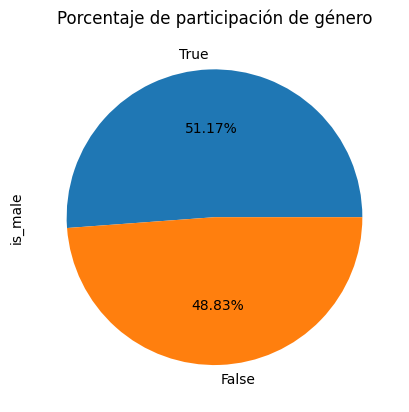

In [ ]:
df['is_male'].value_counts().plot(kind='pie', autopct ='%.2f%%',
                                  title ='Porcentaje de participación de género') ### Podemos observar que la mayoria de los nacidos para el año 2022 fueron hombres con un 51%

In [ ]:
peso_mean_gen = df.groupby(['is_male']).weight_pounds.mean().round(1)
peso_mean_gen

is_male
False    7.1
True     7.3
Name: weight_pounds, dtype: float64

podemos observar que en promedio las niñas tienen un peso de 7.1 y los niños de 7.3 libras al nacer esto nos indica que no son nacimientos de bajo peso ya que para ser considerados de esta forma deben pesar 5.5 libras. 

[]

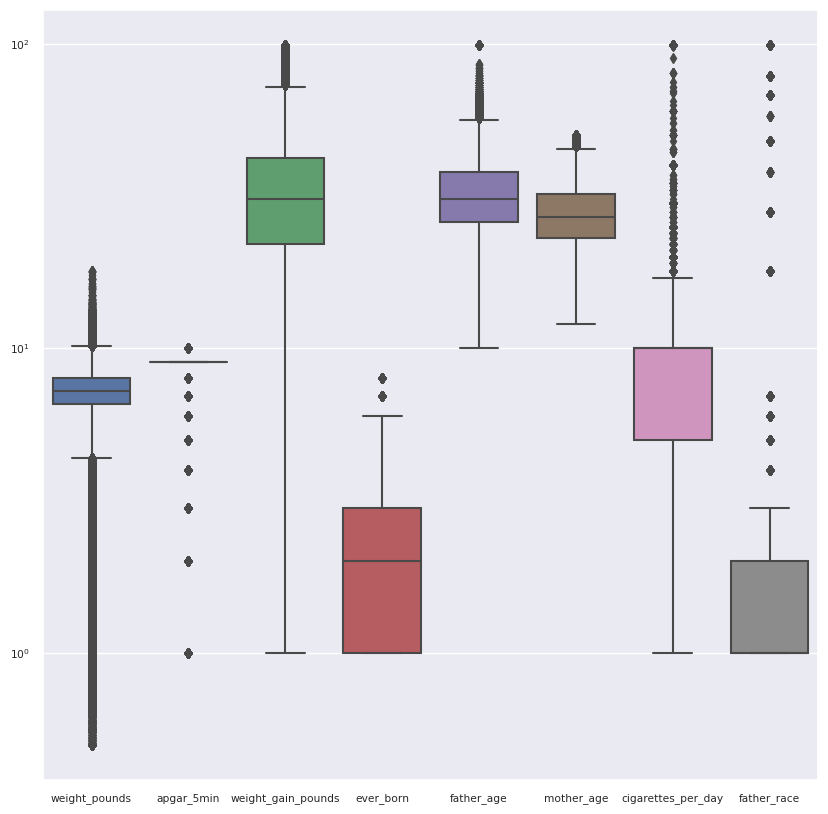

In [ ]:
### Boxplot
sns.set(rc={'figure.figsize':(10,10)}, font_scale = 0.7)
sns.boxplot(data=df_numeric)
plt.semilogy()

Podemos observar que tenemos variables que presentan valores atipicos, como por ejemplo la edad del padre el peso del bebe al nacer entre otras.Adicionalmente tenemos columnas con diferentes magnitudes es importante realizar transformación de datos para ajustarlas al modelo.

<ipython-input-35-48c239088b20>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax = ax[i][j], data = df, x=dict[k], bins = bins[k], stat="density", common_norm=False, shrink = 0.8, palette='YlOrBr')
<ipython-input-35-48c239088b20>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax = ax[i][j], data = df, x=dict[k], bins = bins[k], stat="density", common_norm=False, shrink = 0.8, palette='YlOrBr')
<ipython-input-35-48c239088b20>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax = ax[i][j], data = df, x=dict[k], bins = bins[k], stat="density", common_norm=False, shrink = 0.8, palette='YlOrBr')
<ipython-input-35-48c239088b20>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax = ax[i][j], data = df, x=dict[k], bins = bins[k], stat="density", common_norm=False, shrink = 0.8, palette='YlOrBr')


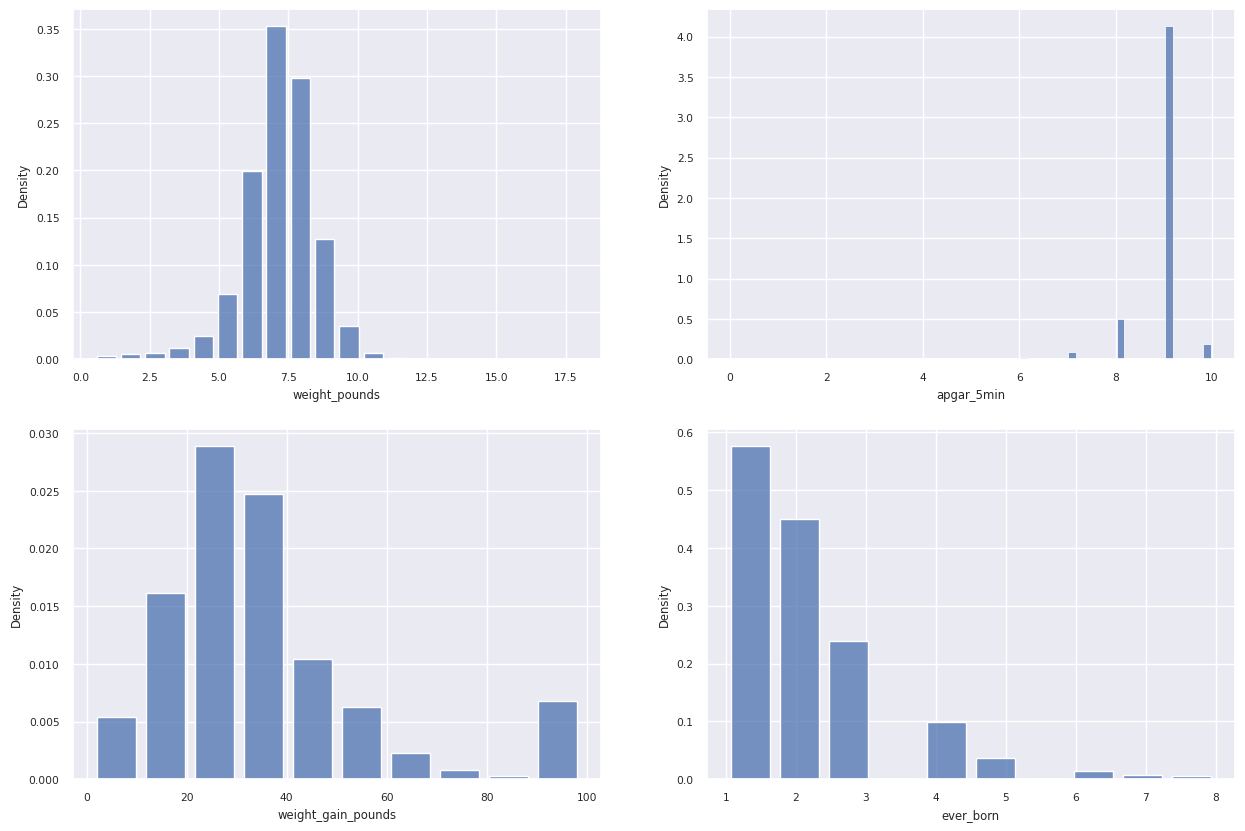

In [ ]:
### Histograma
ig, ax = plt.subplots(2,2, figsize=(15,10))

dict = {i: df_numeric.select_dtypes(include=['float64']).columns.to_list()[i] for i in range(4)} #Creación de diccionario para homologar llamado del ciclo iterativo
bins = {0: 20 , 1: 50 , 2: 10, 3: 10}

k = 0

for i in range(2):
    for j in range(2):

      
        sns.histplot(ax = ax[i][j], data = df, x=dict[k], bins = bins[k], stat="density", common_norm=False, shrink = 0.8, palette='YlOrBr')
        k += 1


Podemos observar que las variables weigth_gain pounds y ever_born presentan asimetria a la derecha. en promedio el peso de las madres en el embarazo aumenta entre 30 a 40 lbs y la mayoria de las madres tienen entre 1 a 2 hijos. Por otra parte la mayoria de los niños nacidos tienen un estado de salud clasificado como muy bueno, por ultimo como mencionamos anteriormente en promedio los niños naces con un peso de 7.2 lbs.

Un punto importante a resaltar es que la cantidad de hijos vivos que tiene una madre despues del embarazo presenta valores atipicos despues de los 6 hijos.



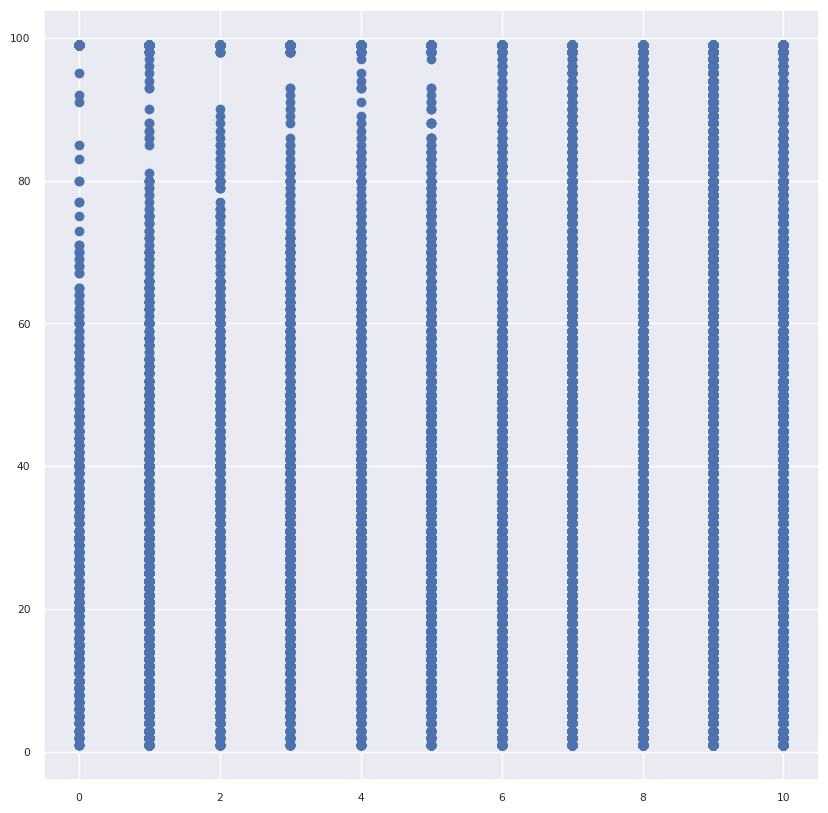

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_numeric['apgar_5min'], y = df_numeric['weight_gain_pounds'])

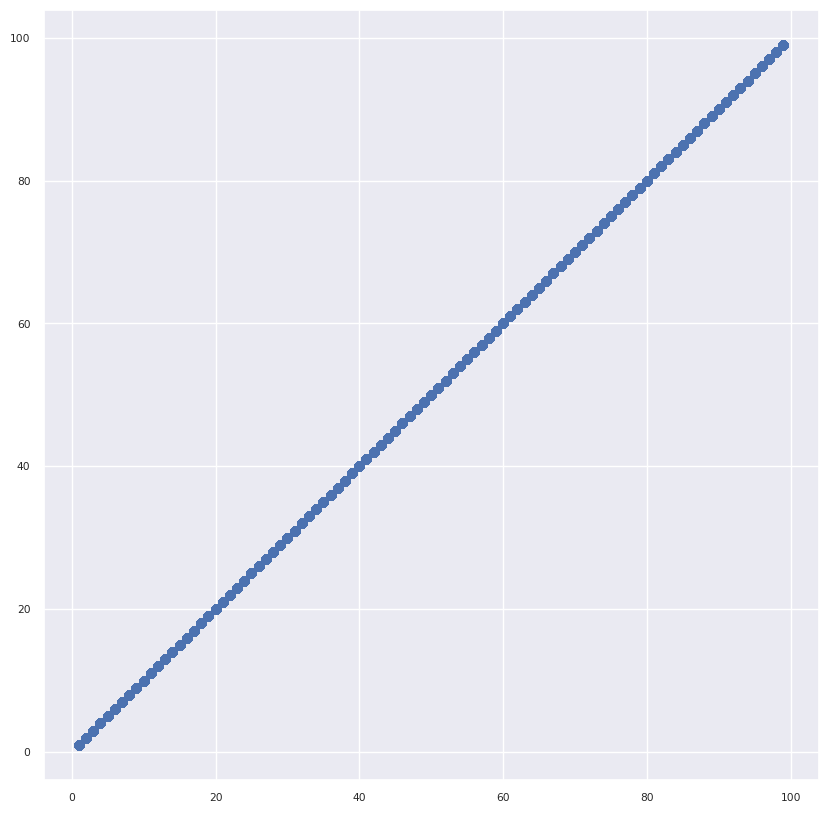

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_numeric['weight_gain_pounds'], y = df_numeric['weight_gain_pounds'])

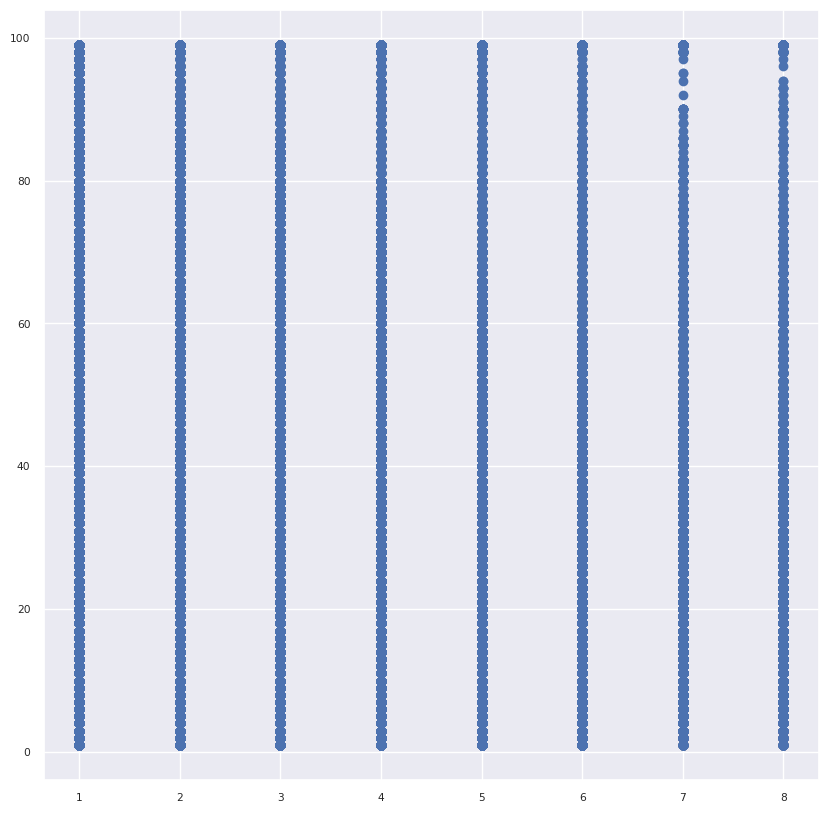

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_numeric['ever_born'], y = df_numeric['weight_gain_pounds'])

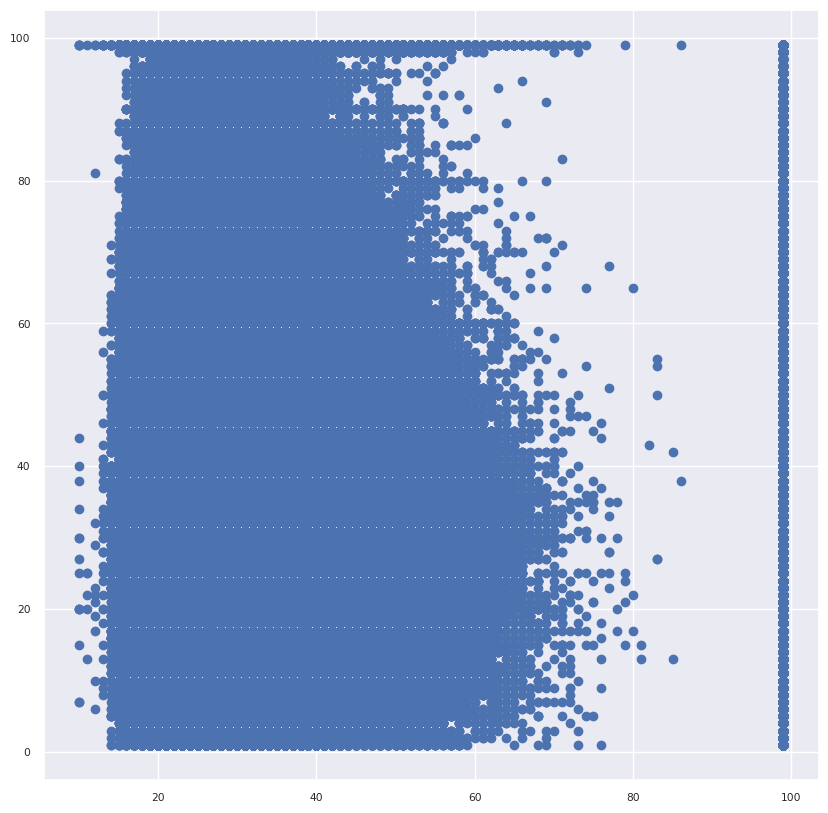

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_numeric['father_age'], y = df_numeric['weight_gain_pounds'])

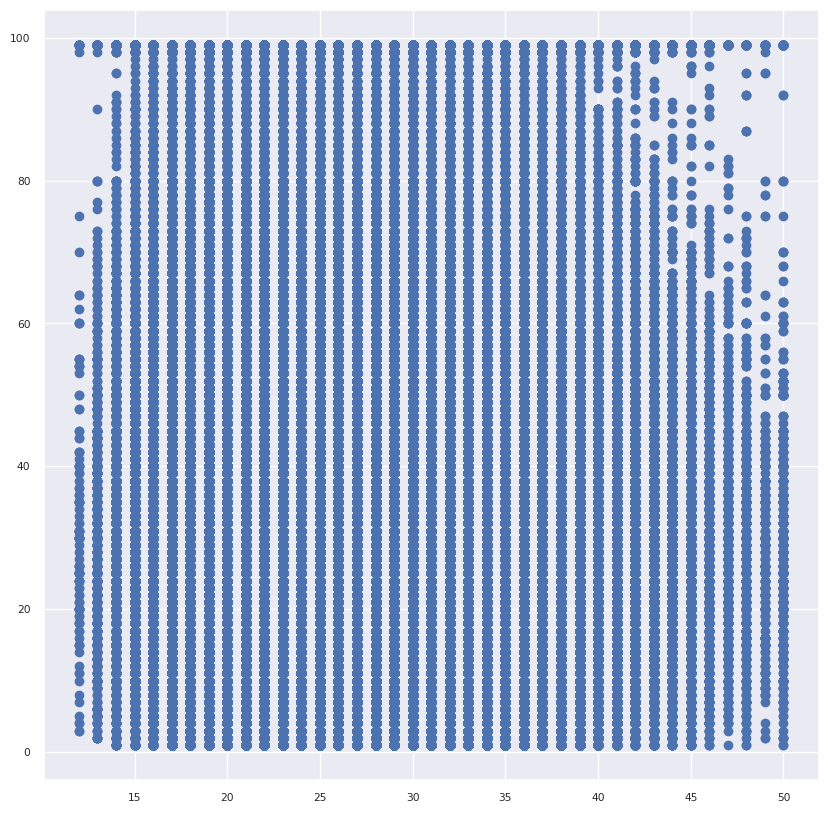

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_numeric['mother_age'], y = df_numeric['weight_gain_pounds'])

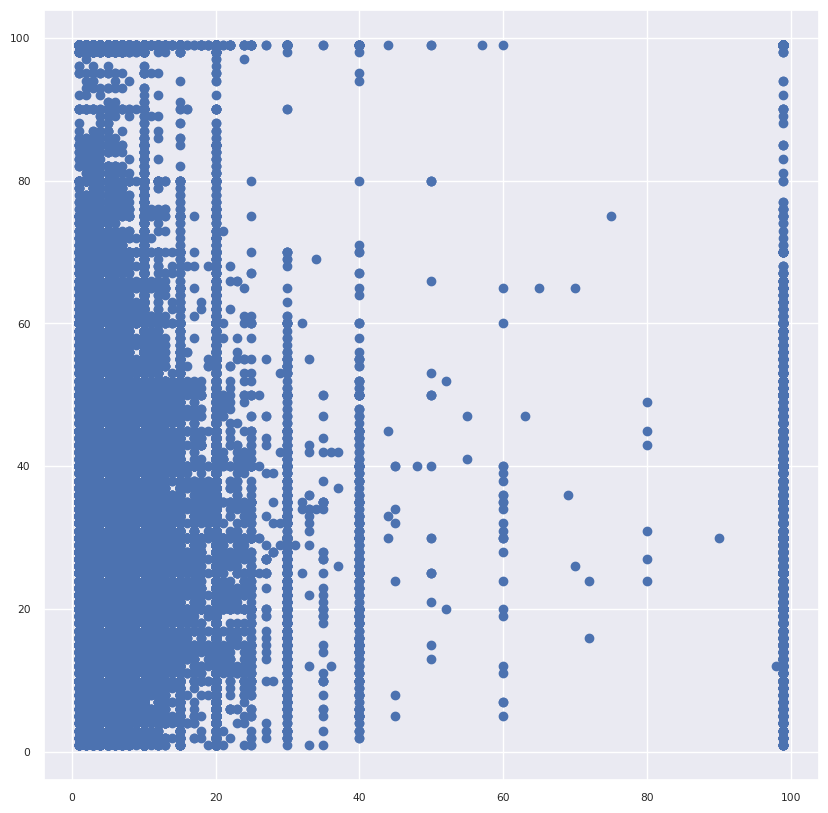

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_numeric['cigarettes_per_day'], y = df_numeric['weight_gain_pounds'])

In [ ]:
# Matriz de correlación
# ==============================================================================
corr_matrix = df_numeric.corr(method='pearson')
corr_matrix

,weight_pounds,apgar_5min,weight_gain_pounds,ever_born,father_age,mother_age,cigarettes_per_day,father_race
weight_pounds,1.000000,0.242575,0.075785,0.021223,-0.080341,0.064084,-0.023072,-0.103519
apgar_5min,0.242575,1.000000,-0.020309,0.021342,-0.033031,0.012619,-0.025171,-0.033418
weight_gain_pounds,0.075785,-0.020309,1.000000,-0.052187,0.011452,-0.032272,0.050256,0.014882
ever_born,0.021223,0.021342,-0.052187,1.000000,0.072070,0.342316,0.051028,0.011145
father_age,-0.080341,-0.033031,0.011452,0.072070,1.000000,-0.032147,0.015740,0.854728
mother_age,0.064084,0.012619,-0.032272,0.342316,-0.032147,1.000000,0.046304,-0.225124
cigarettes_per_day,-0.023072,-0.025171,0.050256,0.051028,0.015740,0.046304,1.000000,0.007944
father_race,-0.103519,-0.033418,0.014882,0.011145,0.854728,-0.225124,0.007944,1.000000


In [ ]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
60,father_race,father_age,0.854728,0.854728
39,father_age,father_race,0.854728,0.854728
29,ever_born,mother_age,0.342316,0.342316
43,mother_age,ever_born,0.342316,0.342316
1,weight_pounds,apgar_5min,0.242575,0.242575
8,apgar_5min,weight_pounds,0.242575,0.242575
61,father_race,mother_age,-0.225124,0.225124
47,mother_age,father_race,-0.225124,0.225124
56,father_race,weight_pounds,-0.103519,0.103519
7,weight_pounds,father_race,-0.103519,0.103519


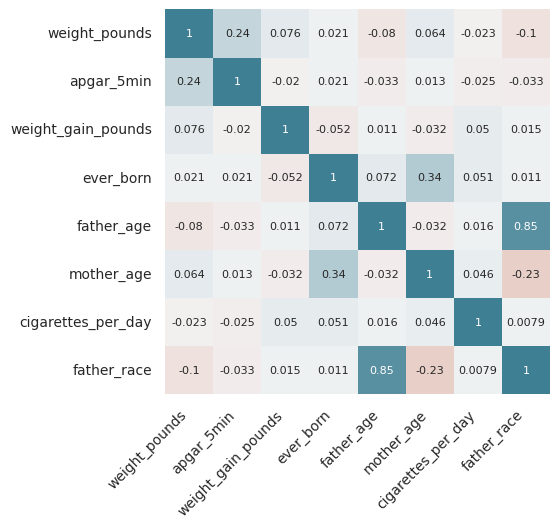

In [ ]:
#### Correlograma

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

Podemos observar que la mayoria de nuestras variables numericas no presentan una correlación alto lo que nos indica que podemos usarlas todas para nuestro modelo. Es importante resaltar que la variable cantidad de hijos y edad de la madre tienen una correlación del 34% y la variable peso del recien nacido y el indice de salud a los 5 minutos de haber nacido tienen una correlación del 24%. Aun así podemos usarlas ya que no tienen correlación muy alta.

#**3. Preparación de los datos**

Una vez completado el EDA se procede a realizar las modificaciones pertinentes a cada una de las variables y realizar los siguientes procesos para darle mayor eficiencia a nuestros modelos:



1.  Eliminar variables redundantes o que no aportan información.
2. Creación de variables dummy.
3.  Imputar datos a variables numericas para dar mayor completitud a los datos.
4. dividvir nuestro dataset en train y test.
5. normalizar y estandarizar los datos para evitar influencias.







In [27]:
### definir dataframe final
df_final = df.loc[:, ['month','is_male','weight_pounds','plurality','cigarettes_per_day','apgar_5min', 'mother_race','weight_gain_pounds', 'ever_born','father_age','mother_age','gestation_weeks','wday'] ]
df_final.head()

,month,is_male,weight_pounds,plurality,cigarettes_per_day,apgar_5min,mother_race,weight_gain_pounds,ever_born,father_age,mother_age,gestation_weeks,wday
0,4,False,6.437498,1,NaN,9.0,NaN,30.0,8.0,49,34,38.0,5
1,3,False,7.262027,1,NaN,9.0,NaN,99.0,8.0,45,38,40.0,5
2,12,True,6.000983,1,NaN,9.0,NaN,54.0,8.0,38,30,36.0,2
3,10,True,8.126239,1,NaN,9.0,NaN,30.0,8.0,39,31,38.0,4
4,11,False,7.312733,1,NaN,9.0,NaN,10.0,8.0,40,39,39.0,4


Despues de revisar las variables que vamos a tomar para nuestro modelo la cantidad de columnas se reduce de 31 a 12, por este motivo adicionalmente reducimos los problemas de dimensionalidad que se estaban presentando anteriormente. Por otra parte, es importante cambiar a categorias las variables de plurality e is-male para poder covertirlas en dummy.

In [28]:
### cambiar tipo a categoria
df_final['plurality'] = df_final['plurality'].astype('category')
df_final['is_male'] = df_final['is_male'].astype('category')

In [30]:
#creación de variables dummy ("one hot encoding")
df_final = pd.get_dummies(df_final, columns = df_final.select_dtypes(exclude=['int64','float64']).columns, drop_first = True) # excluimos varibales tipo numericas enteros y fracción para dumificar las otras categorias 
pd.options.display.max_columns = None # Removemos el limite de columnas que vamos a mostrar

df_final.head()  # Nuestro dataset ahora tiene 14 columnas.

,month,weight_pounds,cigarettes_per_day,apgar_5min,mother_race,weight_gain_pounds,ever_born,father_age,mother_age,gestation_weeks,wday,is_male_True_1,plurality_2_1,plurality_3_1,plurality_4_1,plurality_5_1
0,4,6.437498,NaN,9.0,NaN,30.0,8.0,49,34,38.0,5,0,0,0,0,0
1,3,7.262027,NaN,9.0,NaN,99.0,8.0,45,38,40.0,5,0,0,0,0,0
2,12,6.000983,NaN,9.0,NaN,54.0,8.0,38,30,36.0,2,1,0,0,0,0
3,10,8.126239,NaN,9.0,NaN,30.0,8.0,39,31,38.0,4,1,0,0,0,0
4,11,7.312733,NaN,9.0,NaN,10.0,8.0,40,39,39.0,4,0,0,0,0,0


In [8]:
### Reemplazar NA por 0
df_final = df_final.fillna({'cigarettes_per_day': 0})

Lo primero que realizamos es por definición cada valor NA que se encuentren en las columnas de cigarrillos por día y tragos por semana seran reemplazados por 0

In [9]:
## Imputación de datos

# creating surrogates
for col in df_final:
    if df_final[col].isna().sum() != 0: 
        df_final[col + '_surrogate'] = df_final[col].isna().astype(int)
           
# fixing numericals 
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
imputer.fit(df_final.select_dtypes(include=['int64','float64']))
df_final[df_final.select_dtypes(include=['int64','float64']).columns] = imputer.transform(df_final.select_dtypes(include=['int64','float64']))

Despues de imputar los datos nos podemos dar cuenta que ya no presentamos valores nulos dentro de nuestro dataframe. el metodo que se uso para imputar fue por medio de la mediana.

In [10]:
### Estandarización 
df_final = (df_final - df_final.min()) / (df_final.max() - df_final.min())
df_final.head()

,month,weight_pounds,cigarettes_per_day,apgar_5min,mother_race,weight_gain_pounds,ever_born,father_age,mother_age,gestation_weeks,wday,is_male_True,plurality_2,plurality_3,plurality_4,plurality_5,weight_pounds_surrogate,apgar_5min_surrogate,mother_race_surrogate,weight_gain_pounds_surrogate,ever_born_surrogate,gestation_weeks_surrogate
0,0.272727,0.339254,0.0,0.9,0.0,0.295918,1.0,0.438202,0.578947,0.700000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.181818,0.386369,0.0,0.9,0.0,1.000000,1.0,0.393258,0.684211,0.766667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.000000,0.314311,0.0,0.9,0.0,0.540816,1.0,0.314607,0.473684,0.633333,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.818182,0.435752,0.0,0.9,0.0,0.295918,1.0,0.325843,0.500000,0.700000,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.909091,0.389267,0.0,0.9,0.0,0.091837,1.0,0.337079,0.710526,0.733333,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Estandarizamos los datos para definir una misma magitud de valores y evitar la influencia en los modelos.

In [ ]:
print(df_final['plurality_2'].value_counts())
print(df_final['plurality_3'].value_counts())
print(df_final['plurality_4'].value_counts())
print(df_final['plurality_5'].value_counts())

0.0    4116290
1.0     138866
Name: plurality_2, dtype: int64
0.0    4249271
1.0       5885
Name: plurality_3, dtype: int64
0.0    4254811
1.0        345
Name: plurality_4, dtype: int64
0.0    4255110
1.0         46
Name: plurality_5, dtype: int64


In [ ]:
### eliminar columna plurality_5
#df_final = df_final.drop(['plurality_5'], axis=1)
#df_final.head()

##Train y test

In [11]:
y = df_final['weight_pounds']
X = df_final.drop(columns = 'weight_pounds')

In [ ]:
print(y.shape)
print(X.shape)

(4255156,)
(4255156, 21)


In [12]:
# Para futuras comparaciones establecemos una semilla para generar numeros alea
np.random.seed(4406)

# Dividimos aleatoriamente los datos en 80% train y 20% test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 4406)

Para empezar a desarrollar nuestro modelo partimos nuestras data en un 80% train y un 20% test.

In [ ]:
print(y_train.shape)
print(y_test.shape)

(3404124,)
(851032,)


#**4. Modelos**

**Regresión multiple** 

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()
## se entrena el modelo
lr_multiple.fit(X_train,y_train)
## se realiza prediccion
y_pred_multiple = lr_multiple.predict(X_test)

In [ ]:
print('Presición del modelo:')
print(lr_multiple.score(X_train,y_train))

Presición del modelo:
0.3657193242892164


**SVM Regresion**

In [ ]:
from sklearn import svm
from sklearn import model_selection
from statsmodels.tools.eval_measures import mse

modelo_svm = svm.SVR()
modelo_svm.fit(X_train,y_train)

Se intenta entresnar un modelo SVM pero el costo computacional es muy alto.

**XGBOOST Regresion**

In [13]:
from xgboost import XGBRegressor
import xgboost as xgb

xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 180, learning_rate = 0.3, subsample = 0.8, seed = 123)

# Fitting the model
xgb_r.fit(X_train,y_train)


[00:47:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=180, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

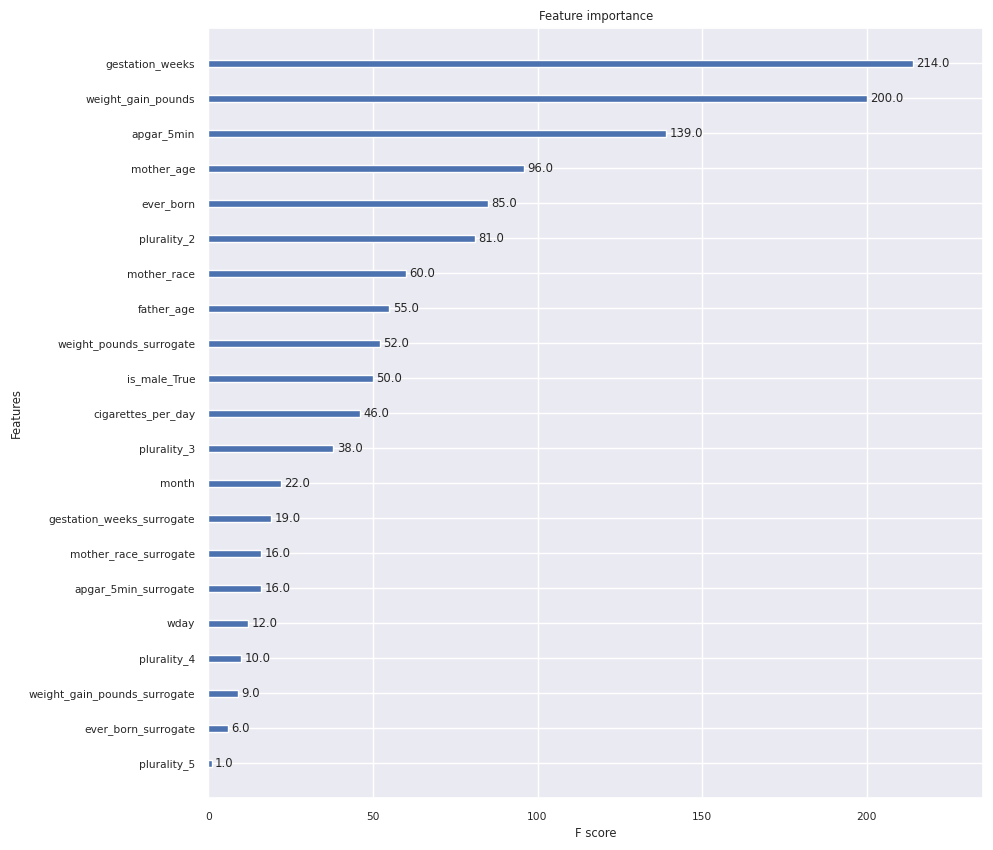

In [ ]:
%matplotlib inline
xgb.plot_importance(xgb_r ,ax=plt.gca())

In [14]:
y_pred_xgb = xgb_r.predict(X_test)

In [15]:
y_pred_xgb[1:10]

array([0.33295682, 0.45367804, 0.4132469 , 0.41549528, 0.40333816,
       0.3060681 , 0.4087352 , 0.39467272, 0.39820477], dtype=float32)

In [16]:
pred_train = xgb_r.predict(X_train)

Validación del modelo

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

print(r2_score(y_train, pred_train))

0.4432029004988546


Testing MSE

In [18]:
print(mean_squared_error(y_train, pred_train))

0.003089364065148495


In [19]:
xgb_r.score(X_test,y_test)

0.43794889586697305

In [ ]:
from sklearn.model_selection import GridSearchCV

model_xgb = XGBRegressor(gpu_id = 0, learning_rate = 0.3, max_depth= 6, n_stimators = 100, subsample = 0.8)

tuned_parameters = {
    'max_depth':[3,4,5,6],
    'min_child_weight': [3,4,5,6],
    'gamma': [i/10.0 for i in range(0,5)],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

clf = GridSearchCV(model_xgb, param_grid= tuned_parameters, cv = 2)
clf.fit(X_train,y_train)

print('mejores_parametros:')
print(clf.best_params_)
print('mejor_score:')
print(clf.best_score_)



[00:35:44] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[00:35:44] WARNING: ../src/learner.cc:767: 
Parameters: { "n_stimators" } are not used.

[00:36:58] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[00:36:58] WARNING: ../src/learner.cc:767: 
Parameters: { "n_stimators" } are not used.

[00:38:20] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[00:38:20] WARNING: ../src/learner.cc:767: 
Parameters: { "n_stimators" } are not used.

[00:39:34] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[00:39:34] WARNING: ../src/learner.cc:767: 
Parameters: { "n_stimators" } are not used.

[00:40:49] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[00:40:49] WARNING: ../src/learner.cc:767: 
Parameters: { "n_stimators" } are not used.

[00:42:04] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[00:42:04

KeyboardInterrupt: ignored

**Selección de variables** 

Como podemos observar los modelos no tienen una precisión muy alta por lo cual examinaremos que variables 

In [20]:
import statsmodels.api as sn

x_constant = sn.add_constant(X)
lin_reg = sn.OLS(y,x_constant).fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          weight_pounds   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                 1.167e+05
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        01:18:50   Log-Likelihood:             5.9795e+06
No. Observations:             4255156   AIC:                        -1.196e+07
Df Residuals:                 4255134   BIC:                        -1.196e+07
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0151      0.000    -38.509      0.000      -0.016      -0.014
month                           -0.0008   9.24e-05     -8.606      0.000      -0.001      -0.001
cigarettes_per_day              -0.0647      0.001    -77.832      0.000      -0.066      -0.063
apgar_5min                       0.0826      0.000    218.180      0.000       0.082       0.083
mother_race                     -0.0197      0.000    -56.273      0.000      -0.020      -0.019
weight_gain_pounds               0.0284      0.000    209.244      0.000       0.028       0.029
ever_born                        0.0184      0.000    104.363      0.000       0.018       0.019
father_age                      -0.0141      0.000   -134.388      0.000      -0.014      -0.014
mother_age                       0.0375      0.000    197.683      0.000       0.037       0.038
gestation_weeks                  0.4148      0.000   1129.617      0.000       0.414       0.416
wday                            -0.0010   9.44e-05    -10.418      0.000      -0.001      -0.001
is_male_True                     0.0154   5.76e-05    267.107      0.000       0.015       0.015
plurality_2                     -0.0765      0.000   -456.361      0.000      -0.077      -0.076
plurality_3                     -0.1153      0.001   -148.062      0.000      -0.117      -0.114
plurality_4                     -0.1367      0.003    -42.744      0.000      -0.143      -0.130
plurality_5                     -0.1099      0.009    -12.552      0.000      -0.127      -0.093
weight_pounds_surrogate          0.0968      0.001    104.872      0.000       0.095       0.099
apgar_5min_surrogate            -0.0137      0.000    -38.387      0.000      -0.014      -0.013
mother_race_surrogate           -0.0007   6.38e-05    -11.515      0.000      -0.001      -0.001
weight_gain_pounds_surrogate    -0.0111      0.000    -56.932      0.000      -0.011      -0.011
ever_born_surrogate             -0.0117      0.000    -31.497      0.000      -0.012      -0.011
gestation_weeks_surrogate       -0.0349      0.001    -43.443      0.000      -0.037      -0.033
==============================================================================
Omnibus:                    75719.958   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           151987.122
Skew:                           0.066   Prob(JB):                         0.00
Kurtosis:                       3.916   Cond. No.                         610.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.feature_selection import RFECV

model_xgb = XGBRegressor()
selector = RFECV(model_xgb, step = 3, min_features_to_select = 3, cv = 3)
selector.fit(X,y)
print(X.columns)
print(selector.ranking)


Se intenta realizar crossvalidation y encontrar las variables con mayor significacncia pero el costo computacional es muy alto y no genera resultado.

**Red neuronal**

In [33]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

tf.keras.backend.clear_session()  # Para restablecer fácilmente el estado del portátil.

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.12.0


## Construcción del modelo

In [35]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[21]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [36]:
### modelo sin normalizar
model = build_model()
model.fit(X_train,y_train, epochs = 20, verbose=1)

Epoch 1/20
106379/106379 [==============================] - 226s 2ms/step - loss: 0.0033 - mae: 0.0442 - mse: 0.0033
Epoch 2/20
106379/106379 [==============================] - 223s 2ms/step - loss: 0.0032 - mae: 0.0437 - mse: 0.0032
Epoch 3/20
106379/106379 [==============================] - 222s 2ms/step - loss: 0.0032 - mae: 0.0437 - mse: 0.0032
Epoch 4/20
106379/106379 [==============================] - 225s 2ms/step - loss: 0.0032 - mae: 0.0436 - mse: 0.0032
Epoch 5/20
106379/106379 [==============================] - 223s 2ms/step - loss: 0.0032 - mae: 0.0436 - mse: 0.0032
Epoch 6/20
106379/106379 [==============================] - 227s 2ms/step - loss: 0.0032 - mae: 0.0436 - mse: 0.0032
Epoch 7/20
106379/106379 [==============================] - 227s 2ms/step - loss: 0.0032 - mae: 0.0435 - mse: 0.0032
Epoch 8/20
106379/106379 [==============================] - 228s 2ms/step - loss: 0.0032 - mae: 0.0435 - mse: 0.0032
Epoch 9/20
106379/106379 [==============================] - 222s

In [37]:
predictions = model.predict(X_train).flatten()

106379/106379 [==============================] - 163s 2ms/step


In [38]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_train, predictions))

0.43188865518882236


In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50

history = model.fit(
  X_train,y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


..................................................

In [ ]:
predictions = model.predict(X_train).flatten()

93082/93082 [==============================] - 96s 1ms/step


In [ ]:
print(r2_score(y_train, predictions))

0.11914010756682258
